In [6]:
from google.colab import files
src = list(files.upload().values())[0]
open('hy_param.py','wb').write(src)
import hy_param

Saving hy_param.py to hy_param.py


In [7]:
from google.colab import files
src = list(files.upload().values())[0]
open('model.py','wb').write(src)
import model

Saving model.py to model.py
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [8]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-


from __future__ import print_function

# Import MNIST data
import os
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
import model
import hy_param


## tf Graph input
X = model.X
Y = model.Y



checkpoint_dir = os.path.abspath(os.path.join(hy_param.checkpoint_dir, "checkpoints"))
checkpoint_prefix = os.path.join(checkpoint_dir, "model")
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
saver = tf.train.Saver(tf.global_variables(), max_to_keep=2)
        
#loss = tf.Variable(0.0)
# Initialize the variables
init = tf.global_variables_initializer()
all_loss = []
# Start training
with tf.Session() as sess:
    writer_1 = tf.summary.FileWriter("./runs/summary/",sess.graph)
    
    sum_var = tf.summary.scalar("loss", model.accuracy)
    write_op = tf.summary.merge_all()

    # Run the initializer
    sess.run(init)

    for step in range(1, hy_param.num_steps+1):
        # Extracting 
        batch_x, batch_y = mnist.train.next_batch(hy_param.batch_size)
        # Run optimization op (backprop)
        sess.run(model.train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % hy_param.display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc, summary = sess.run([model.loss_op, model.accuracy, write_op], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            all_loss.append(loss)
            writer_1.add_summary(summary, step)
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
        if step % hy_param.checkpoint_every == 0:
            path = saver.save(
                        sess, checkpoint_prefix, global_step=step)
#            print("Saved model checkpoint to {}\n".format(path))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(model.accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    



Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1, Minibatch Loss= 2576.0679, Training Accuracy= 0.211
Step 2, Minibatch Loss= 2195.2676, Training Accuracy= 0.297
Step 3, Minibatch Loss= 1586.9500, Training Accuracy= 0.359
Step 4, Minibatch Loss= 1156.7236, Training Accuracy= 0.516
Step 5, Minibatch Loss= 771.4939, Training Accuracy= 0.617
Step 6, Minibatch Loss= 736.8149, Training Accuracy= 0.586
Step 7, Minibatch Loss= 525.6664, Training Accuracy= 0.703
Step 8, Minibatch Loss= 526.3965, Training Accuracy= 0.719
Step 9, Minibatch Loss= 582.3775, Training Accuracy= 0.695
Step 10, Minibatch Loss= 551.3104, Training Accuracy= 0.727
Step 11, Minibatch Loss= 384.0506, Training Accuracy= 0.773
Step 12, Minibatch Loss= 604.7664, Training Accuracy= 0.672
Step 13, Minibatch Loss= 290.2704, Training Accuracy= 0.828
Step 14, Minibatch Loss= 379.4237, 

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from /content/runs/checkpoints/model-100
Predicted digit:  0
Input image:


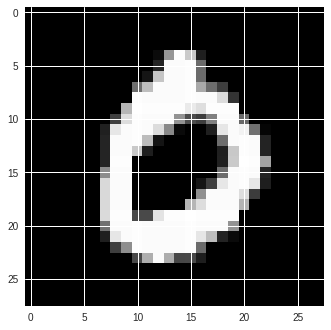

In [10]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-


from __future__ import print_function


import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import hy_param

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Pointing the model checkpoint
checkpoint_file = tf.train.latest_checkpoint(os.path.join(hy_param.checkpoint_dir, 'checkpoints'))
saver = tf.train.import_meta_graph("{}.meta".format(checkpoint_file))

# Loading test data
test_data = np.array([mnist.test.images[3]])

# Loading input variable from the model
input_x = tf.get_default_graph().get_operation_by_name("input_x").outputs[0]

# Loading Prediction operation
prediction = tf.get_default_graph().get_operation_by_name("prediction").outputs[0]


with tf.Session() as sess:
    # Restoring the model from the checkpoint
    saver.restore(sess, checkpoint_file)
    
    # Executing the model to make predictions    
    data = sess.run(prediction, feed_dict={input_x: test_data })
    
    print("Predicted digit: ", data.argmax() )


# Display the feed image
print ("Input image:")
plt.gray()
plt.imshow(test_data.reshape([28,28]))
